# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('C:\\Users\\tente\\Documents\\udemyds\\Data\\Alarm Survey Data.xlsx')
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [3]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [4]:
df['alarm_rating'] = pd.to_numeric(df['alarm_rating'].astype('str').str.replace(' stars',''))

In [5]:
df['alarm_rating'].astype('int')
df['number_of_children'].astype('int')
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,light,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [7]:
df.isna().sum()

survey_id               0
age                     0
number_of_children      0
activity_level          0
sleep_quality         351
number_of_snoozes       0
alarm_rating            0
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [9]:
df.sleep_quality.value_counts(dropna=False)

5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: sleep_quality, dtype: int64

In [10]:
df['sleep_quality'] = df['sleep_quality'].fillna(df['sleep_quality'].median())
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,light,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [11]:
df.isna().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [12]:
df['activity_level'].value_counts()

active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: activity_level, dtype: int64

In [13]:
df['number_of_children'].value_counts()

0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: number_of_children, dtype: int64

In [14]:
import numpy as np


In [15]:

df.activity_level = np.where(df.activity_level.isin(['light_activity','light']), 'lightly active', df.activity_level)

In [16]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [17]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3
6367,6301,27,2.0,lightly active,4.0,0,2
6368,6302,41,3.0,lightly active,5.0,0,2
6369,6303,25,0.0,lightly active,5.0,0,5
6370,6304,25,1.0,lightly active,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


In [20]:
df.reset_index(drop=True, inplace=True)
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [21]:
import seaborn as sns

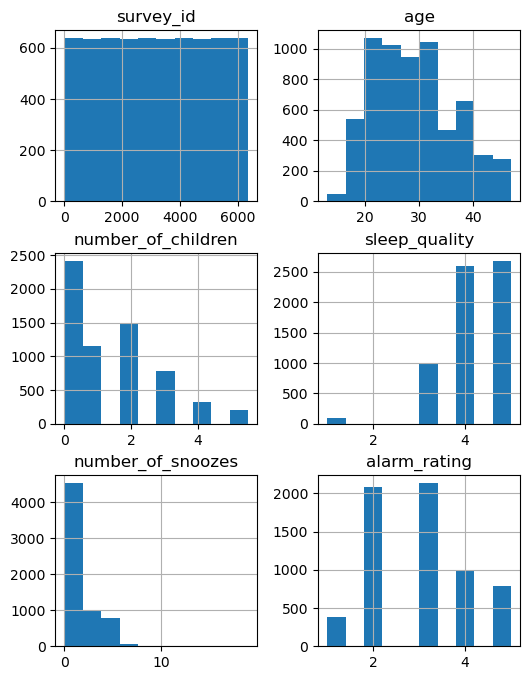

In [22]:
df.hist(figsize=(6,8));

<AxesSubplot:xlabel='number_of_snoozes', ylabel='Count'>

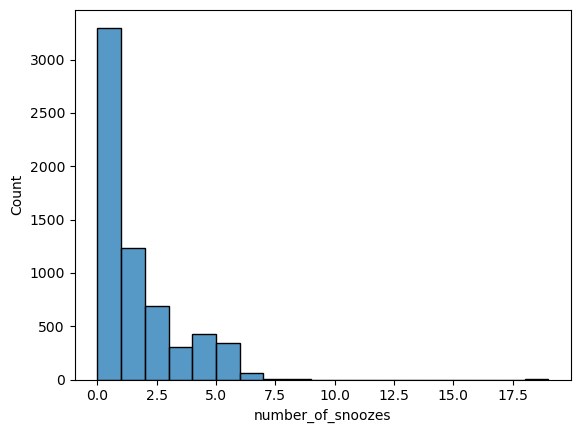

In [23]:
sns.histplot(x = df.number_of_snoozes, binwidth = 1)

<AxesSubplot:xlabel='number_of_snoozes'>

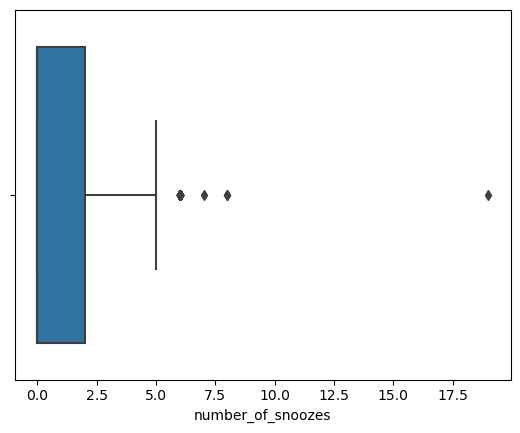

In [24]:
sns.boxplot(x = df.number_of_snoozes)

In [25]:
mean = np.mean(df.number_of_snoozes)
sd = np.std(df.number_of_snoozes)
mean, sd


(1.157869934024505, 1.6034022065364566)

In [26]:
[grade for grade in df.number_of_snoozes if(grade < mean - 3*sd) or (grade > mean + 3*sd)]

[8,
 19,
 8,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [27]:
df[df.number_of_snoozes < 12].mean()

C:\Users\tente\AppData\Local\Temp\ipykernel_1504\1182455133.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.number_of_snoozes < 12].mean()


survey_id             3183.882325
age                     29.076826
number_of_children       1.396936
sleep_quality            4.216968
number_of_snoozes        1.155067
alarm_rating             2.955224
dtype: float64

In [28]:
df.number_of_snoozes = np.where(df.number_of_snoozes >12, 1,df.number_of_snoozes)
df.number_of_snoozes

0       1
1       3
2       1
3       1
4       4
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: number_of_snoozes, Length: 6366, dtype: int64

In [29]:
df.number_of_snoozes.value_counts()

0    3300
1    1230
2     693
4     427
5     345
3     309
6      59
8       2
7       1
Name: number_of_snoozes, dtype: int64

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [30]:
df[df.isna().any (axis = 1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [31]:
df.activity_level.value_counts()

lightly active    3288
active            2422
very active        656
Name: activity_level, dtype: int64

In [32]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [33]:
df.number_of_snoozes.value_counts()

0    3300
1    1230
2     693
4     427
5     345
3     309
6      59
8       2
7       1
Name: number_of_snoozes, dtype: int64

## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [35]:
pen = pd.read_excel('C:\\Users\\tente\\Documents\\udemyds\\Data\\Pen Sales Data.xlsx')

In [36]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [37]:
pen.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [38]:
pen['Total Spend'] = pen['Pen Cost'] + pen['Shipping Cost']
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [39]:
import numpy as np

In [ ]:
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [46]:
pen['Free Shipping'] = np.where(pen['Shipping Cost'] == 0, 'Yes', 'No')

In [47]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [ ]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [48]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


In [51]:
pen['Delivery Time'] = pen['Delivery Date'] - pen['Purchase Date']

In [62]:
pen['Week Day']=pen['Delivery Date'].dt.dayofweek
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,Week Day
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,2
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,3
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,1
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,3
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,2


In [63]:
day_mapping = {0: 'Monday',
              1:'Tuesday',
              2: 'Wednesday',
              3: 'Thursday',
              4: 'Friday',
              5: 'Saturday',
              6: 'Sunday'}

In [64]:
pen['Week Day'] = pen['Week Day'].map(day_mapping)
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,Week Day
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,Wednesday
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,Thursday
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,Tuesday
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,Thursday
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,Wednesday


In [52]:
pen['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [ ]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [66]:
pen.Review.str.split('|').to_list()

[['DoodleWithMe',
  "I love the way this pen writes, but unfortunately it has a tendency to leak if left unused for too long. It's important to keep it capped when not in use."],
 ['ScribbleMaster',
  "The classic Sharpie marker has a bold, permanent ink that works on almost any surface. It's perfect for labeling, drawing, or writing in a variety of settings."],
 ['PenPalForever',
  'The retractable ballpoint pen has a durable, metal clip and a sturdy design. It writes with a consistent flow and is a reliable choice for everyday use.'],
 ['TheWriteWay',
  "This gel pen has a comfortable grip and writes with vibrant, consistent ink. It's perfect for taking notes or writing in a journal."],
 ['PenAndPaperPerson',
  "The rollerball pen has a smooth, fluid feel and creates bold, expressive lines. It's a great option for artists and writers who want to add personality to their work."],
 ['SmoothOperatorPen',
  "This gel pen writes smoothly with a bold, vibrant ink that stands out on paper. 

In [67]:
pen[['User Name','Review Text']]= pd.DataFrame(pen.Review.str.split('|').to_list())

In [68]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,Week Day,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,Wednesday,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,Thursday,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,Tuesday,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,Thursday,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,Wednesday,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [74]:
pen = pen.drop('Review', axis=1)

In [76]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Total Spend,Free Shipping,Delivery Time,Week Day,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,8.98,No,2 days,Wednesday,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,12.99,Yes,3 days,Thursday,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,11.94,No,1 days,Tuesday,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,8.98,No,3 days,Thursday,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,No,2 days,Wednesday,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [ ]:
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [86]:
pen['Review Text'].str.lower().str.contains('Leak|spill', regex=True)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20    False
21    False
22    False
23    False
24    False
Name: Review Text, dtype: bool

In [87]:
pen['Leak or Spill'] = pen['Review Text'].str.lower().str.contains('Leak|spill')

In [88]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Total Spend,Free Shipping,Delivery Time,Week Day,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,8.98,No,2 days,Wednesday,DoodleWithMe,"I love the way this pen writes, but unfortunat...",False
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,12.99,Yes,3 days,Thursday,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,11.94,No,1 days,Tuesday,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,8.98,No,3 days,Thursday,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,No,2 days,Wednesday,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
